In [1]:
import numpy as np
import pandas as pd
import gen_data
import regex as re
import seaborn as sns

In [2]:
industries = pd.read_csv('IndustryByState_2005-2021.csv').drop(columns=['GeoFips','LineCode'])
industries.loc[:,'Description'] = industries.loc[:,'Description'].apply(lambda x: x.strip())
industries = industries.set_index(['GeoName', 'Description']).mean(axis=1).reset_index('Description')
industries = industries.pivot(columns='Description',values=0)
industries.columns = industries.columns.to_list()
industries.index.rename('State', inplace=True)
industries = industries[['Information']].rename(columns = {'Information':'GDPcont_t0'})

spat = {"New England" : ['Connecticut', 'Maine', 'Massachusetts', 'New Hampshire', 'Rhode Island', 'Vermont'],
 "Mideast" : ['Delaware','District of Columbia','Maryland', 'New Jersey', 'New York', 'Pennsylvania'],
 "Great Lakes" : ['Illinois','Indiana','Michigan','Ohio','Wisconsin'],
 "Plains" : ['Iowa','Kansas','Minnesota','Missouri','Nebraska','North Dakota', 'South Dakota'],
 "Southeast" : ['Alabama', 'Alabama', 'Arkansas', 'Florida','Georgia', 'Kentucky','Louisiana','Mississippi','North Carolina','South Carolina','Tennessee','Virginia','West Virginia'],
 "Southwest" : ['Arizona','New Mexico','Oklahoma','Texas'],
 "Rocky Mountain" : ['Colorado', 'Idaho', 'Montana', 'Utah', 'Wyoming'],
 "Far West" : ['Alaska', 'California','Hawaii','Nevada','Oregon','Washington']}
spat_inv = {}
for region, states in spat.items():
    sub_dict = {state : region for state in states}
    spat_inv.update(sub_dict)
spat_inv

regions = industries.reset_index('State')['State'].apply(lambda x: spat_inv[x])
regions.index = industries.index
industries.loc[:,'Region'] = regions
industries.to_csv('IndustriesTechClean.csv')
industries.sort_values('GDPcont_t0', ascending=False)

,GDPcont_t0,Region
State,,
Washington,0.947419,Far West
California,0.709355,Far West
New York,0.465806,Mideast
Pennsylvania,0.418226,Mideast
Georgia,0.370968,Southeast
Connecticut,0.313871,New England
Utah,0.310000,Rocky Mountain
Colorado,0.268387,Rocky Mountain
Massachusetts,0.259516,New England


In [3]:
%load_ext autoreload
%autoreload 2

In [4]:
simLong, treatment = gen_data.sim_data(industries, **gen_data.sim_params)
simLong

,,stateControls_t,GDPcont_t
State,t,,
California,0,0.003212,0.709355
Colorado,0,0.004433,0.268387
North Carolina,0,0.007443,0.201129
Tennessee,0,0.004053,0.145323
Michigan,0,0.003518,0.098226
...,...,...,...
Mississippi,10,0.005963,0.277139
Indiana,10,0.020330,0.549244
Arkansas,10,0.018848,0.536415


In [20]:
simLong

,,stateControls_t,GDPcont_t
State,t,,
California,0,0.003212,0.709355
Colorado,0,0.004433,0.268387
North Carolina,0,0.007443,0.201129
Tennessee,0,0.004053,0.145323
Michigan,0,0.003518,0.098226
...,...,...,...
Mississippi,10,0.005963,0.277139
Indiana,10,0.020330,0.549244
Arkansas,10,0.018848,0.536415


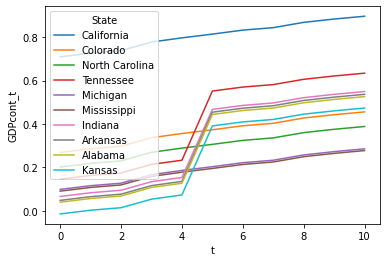

In [6]:
ax = sns.lineplot(data= simLong, x = 't', y = 'GDPcont_t', hue = 'State')
# ax.get_legend().remove()

In [26]:
import fit_model
lm, data, baseline = fit_model.fit_TWFE(data=simLong,
                                        treatment_years=treatment,
                                        target = 'GDPcont_t',
                                        linear_time=False,
                                        treat_dummy_type='time_variant')

                   treatment_effect  t_1  t_2  t_3  t_4  t_5  t_6  t_7  t_8  \
State          t                                                              
California     0           0.302326  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0   
Colorado       0           0.302538  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0   
North Carolina 0           0.301348  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0   
Tennessee      0           0.301550  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0   
Michigan       0           0.303051  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0   
...                             ...  ...  ...  ...  ...  ...  ...  ...  ...   
Mississippi    10          0.302129  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0   
Indiana        10          0.296621  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0   
Arkansas       10          0.301857  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0   
Alabama        10          0.299668  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0   
Kansas         10          0.301013  0.0  0.0  0.0  

In [27]:
data

,,state_Arkansas,state_California,state_Colorado,state_Indiana,state_Kansas,state_Michigan,state_Mississippi,state_North Carolina,state_Tennessee,t_1,...,t_7,t_8,t_9,t_10,d_5,d_6,d_7,d_8,d_9,d_10
State,t,,,,,,,,,,,,,,,,,,,,,
California,0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Colorado,0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
North Carolina,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Tennessee,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Michigan,0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Mississippi,10,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
Indiana,10,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0
Arkansas,10,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0


In [28]:
lm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              GDPcont_t   R-squared:                       1.000
Model:                            OLS   Adj. R-squared:                  1.000
Method:                 Least Squares   F-statistic:                 3.767e+05
Date:                Tue, 07 Dec 2021   Prob (F-statistic):          1.33e-201
Time:                        16:45:41   Log-Likelihood:                 647.22
No. Observations:                 110   AIC:                            -1242.
Df Residuals:                      84   BIC:                            -1172.
Df Model:                          25                                         
Covariance Type:            nonrobust                                         
========================================================================================
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                    0.0389      0.000    115.047      0.000       0.038       0.040
state_Arkansas           0.0096      0.000     29.148      0.000       0.009       0.010
state_California         0.6704      0.000   1831.576      0.000       0.670       0.671
state_Colorado           0.2295      0.000    626.859      0.000       0.229       0.230
state_Indiana            0.0248      0.000     75.416      0.000       0.024       0.025
state_Kansas            -0.0533      0.000   -162.145      0.000      -0.054      -0.053
state_Michigan           0.0593      0.000    161.982      0.000       0.059       0.060
state_Mississippi        0.0512      0.000    139.950      0.000       0.050       0.052
state_North Carolina     0.1622      0.000    443.112      0.000       0.161       0.163
state_Tennessee          0.1072      0.000    325.991      0.000       0.107       0.108
t_1                      0.0171      0.000     49.497      0.000       0.016       0.018
t_2                      0.0286      0.000     83.047      0.000       0.028       0.029
t_3                      0.0680      0.000    197.270      0.000       0.067       0.069
t_4                      0.0874      0.000    253.439      0.000       0.087       0.088
t_5                      0.1047      0.000    239.999      0.000       0.104       0.106
t_6                      0.1230      0.000    282.106      0.000       0.122       0.124
t_7                      0.1344      0.000    308.250      0.000       0.134       0.135
t_8                      0.1588      0.000    364.063      0.000       0.158       0.160
t_9                      0.1741      0.000    399.189      0.000       0.173       0.175
t_10                     0.1870      0.000    428.767      0.000       0.186       0.188
d_5                      0.3001      0.001    561.970      0.000       0.299       0.301
d_6                      0.3001      0.001    561.970      0.000       0.299       0.301
d_7                      0.3001      0.001    561.970      0.000       0.299       0.301
d_8                      0.3001      0.001    561.970      0.000       0.299       0.301
d_9                      0.3001      0.001    561.970      0.000       0.299       0.301
d_10                     0.3001      0.001    561.970      0.000       0.299       0.301
==============================================================================
Omnibus:                       10.545   Durbin-Watson:                   2.791
Prob(Omnibus):                  0.005   Jarque-Bera (JB):               22.342
Skew:                           0.260   Prob(JB):                     1.41e-05
Kurtosis:                       5.146   Cond. No.                         14.9
==============================================================================

Notes:
[1] Standard Errors 

In [105]:
baseline

['state_Colorado']